Objective: plot goal differential vs standings points for some top teams

In [1]:
### Import
import GetPbP
import PbPMethods2 as pm2
from pylab import *
%matplotlib inline
import seaborn

In [2]:
### Data setup
gd = {}
gp = {}
for season in range(2007, 2016):
    for team in pm2.get_teams(season):
        seasonteam = '{0:d}{1:s}'.format(season, team)
        gd[seasonteam] = 0
        gp[seasonteam] = set()
        for line in pm2.read_team_pbp(team, season, strengths='all', types=['GOAL']):
            g = pm2.get_game(line)
            if g > 21230:
                break
            else:
                gp[seasonteam].add(g)
                if pm2.get_acting_team(line) == team:
                    gd[seasonteam] += 1
                else:
                    gd[seasonteam] -= 1
    print('Done with', season)
gp2 = {key: len(val) for key, val in gp.items()}
gdpergm = {key: gd[key]/gp2[key] for key in gp}

Done with 2007
Done with 2008
Done with 2009
Done with 2010
Done with 2011
Done with 2012
Done with 2013
Done with 2014
Done with 2015


Let's look at teams with a goal differential per game over 0.6 (roughly +50 per 82)

In [3]:
for key, val in gdpergm.items():
    if val > 0.6:
        print(key, val)

2009CHI 0.7560975609756098
2007DET 0.9024390243902439
2012CHI 1.1041666666666667
2009WSH 1.0121951219512195
2010VAN 0.926829268292683
2013S.J 0.6708860759493671
2008BOS 0.9382716049382716
2015WSH 0.7195121951219512
2014NYR 0.7195121951219512
2011PIT 0.7682926829268293
2008DET 0.6296296296296297
2008S.J 0.6463414634146342
2013BOS 1.0253164556962024
2009VAN 0.6219512195121951
2013STL 0.759493670886076
2010BOS 0.6097560975609756
2013ANA 0.675
2011BOS 0.8292682926829268
2012PIT 0.9791666666666666


And manually add in standings points for these teams from NHL.com

In [4]:
standings = {'2007DET': 115, 
             '2008DET': 112,
             '2008BOS': 116,
             '2008S.J': 117,
             '2009WSH': 121,
             '2009VAN': 103,
             '2009CHI': 112,
             '2010BOS': 103,
             '2010VAN': 117,
             '2011PIT': 108,
             '2011BOS': 102,
             '2012CHI': 77/48*82,
             '2012PIT': 72/48*82,
             '2013ANA': 116,
             '2013BOS': 117,
             '2013STL': 111,
             '2013S.J': 111,
             '2014NYR': 113,
             '2015WSH': 120}

Now, plot:

(100.0, 135.0)

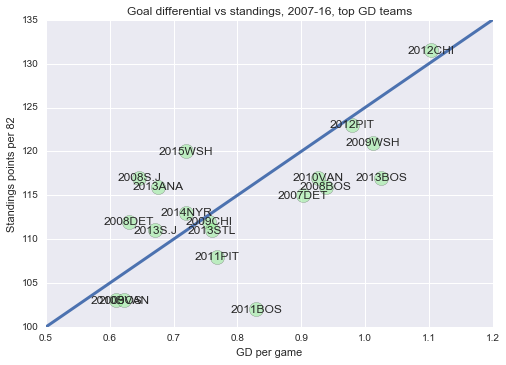

In [6]:
x = [gdpergm[key] for key in standings]
y = [standings[key] for key in standings]
scatter(x, y, c='lightgreen', s=200, alpha=0.5)
for key in standings:
    annotate(key, xy=(gdpergm[key], standings[key]), ha='center', va='center')
xlabel('GD per game')
ylabel('Standings points per 82')
title('Goal differential vs standings, 2007-16, top GD teams')    
from scipy.stats import linregress
m, b, r, p, e = linregress(x, y)
xmin, xmax = xlim()
ymin, ymax = ylim()
plot([xmin, xmax], [ymin, ymax], lw=3)
xlim(xmin, xmax)
ylim(ymin, ymax)